<a href="https://colab.research.google.com/github/tej007-awesome/Machine-Learning-Projects/blob/main/SVR_SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### SVM Classifier

 The SVM is a powerful supervised learning algorithm that can effectively separate data into two or more classes by finding the optimal hyperplane that maximizes the margin between the classes.

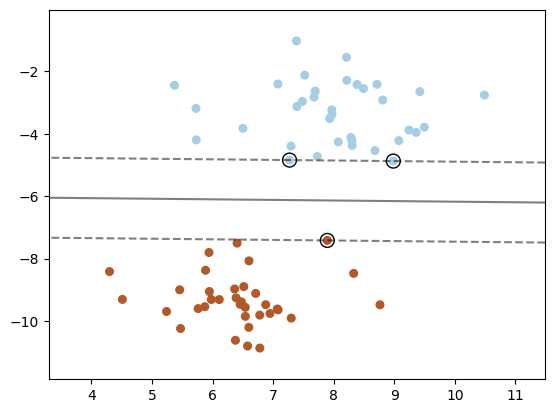

In [ ]:
#Support Vector Machine (SVM) classifier to separate a 2D dataset with two classes.
import matplotlib.pyplot as plt
from sklearn import svm

from sklearn.datasets import make_blobs
from sklearn.inspection import DecisionBoundaryDisplay

X, y = make_blobs(n_samples=70, centers=2, random_state=6)

clf = svm.SVC(kernel="linear", C=1000)
clf.fit(X, y)
plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.Paired)

n
ax = plt.gca()

DecisionBoundaryDisplay.from_estimator(clf, X, plot_method="contour", colors="k", levels=[-1, 0, 1], alpha=0.5, linestyles=["--", "-", "--"], ax=ax)


ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100, linewidth=1, facecolors="none", edgecolors="k")

plt.show()

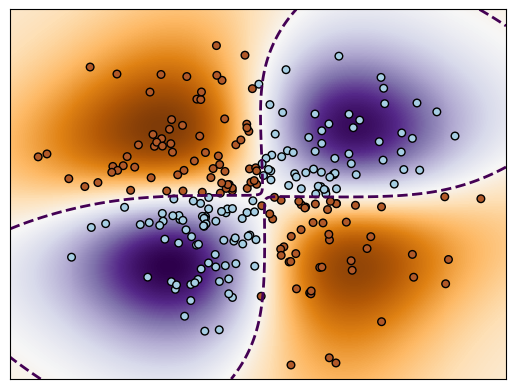

In [ ]:
#Support Vector Machine (SVM) classifier to separate a 2D dataset with a non-linear decision boundary.

import matplotlib.pyplot as plt
from sklearn import svm

xx, yy = np.meshgrid(np.linspace(-3, 3, 500), np.linspace(-3, 3, 500))

np.random.seed(0)

X = np.random.randn(250, 2)

Y = np.logical_xor(X[:, 0] > 0, X[:, 1] > 0)

clf = svm.NuSVC(gamma="auto")

clf.fit(X, Y)

Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])

Z = Z.reshape(xx.shape)

plt.imshow(Z, interpolation="nearest", extent=(xx.min(), xx.max(), yy.min(), yy.max()), aspect="auto", origin="lower", cmap=plt.cm.PuOr_r)

contours = plt.contour(xx, yy, Z, levels=[0], linewidths=2, linestyles="dashed")
plt.scatter(X[:, 0], X[:, 1], s=30, c=Y, cmap=plt.cm.Paired, edgecolors="k")

plt.xticks([])
plt.yticks([])

plt.axis([-3, 3, -3, 3])
plt.show()
import numpy as np

import matplotlib.pyplot as plt
from sklearn import svm

xx, yy = np.meshgrid(np.linspace(-3, 3, 500), np.linspace(-3, 3, 500))

np.random.seed(0)

X = np.random.randn(250, 2)

Y = np.logical_xor(X[:, 0] > 0, X[:, 1] > 0)

clf = svm.NuSVC(gamma="auto")

clf.fit(X, Y)

Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])

Z = Z.reshape(xx.shape)

plt.imshow(Z, interpolation="nearest", extent=(xx.min(), xx.max(), yy.min(), yy.max()), aspect="auto", origin="lower", cmap=plt.cm.PuOr_r)

contours = plt.contour(xx, yy, Z, levels=[0], linewidths=2, linestyles="dashed")
plt.scatter(X[:, 0], X[:, 1], s=30, c=Y, cmap=plt.cm.Paired, edgecolors="k")

plt.xticks([])
plt.yticks([])

plt.axis([-3, 3, -3, 3])
plt.show()

### Support Vector Regression(SVR)

SVR is a powerful algorithm for regression tasks, capable of capturing non-linear relationships between features and target variables.

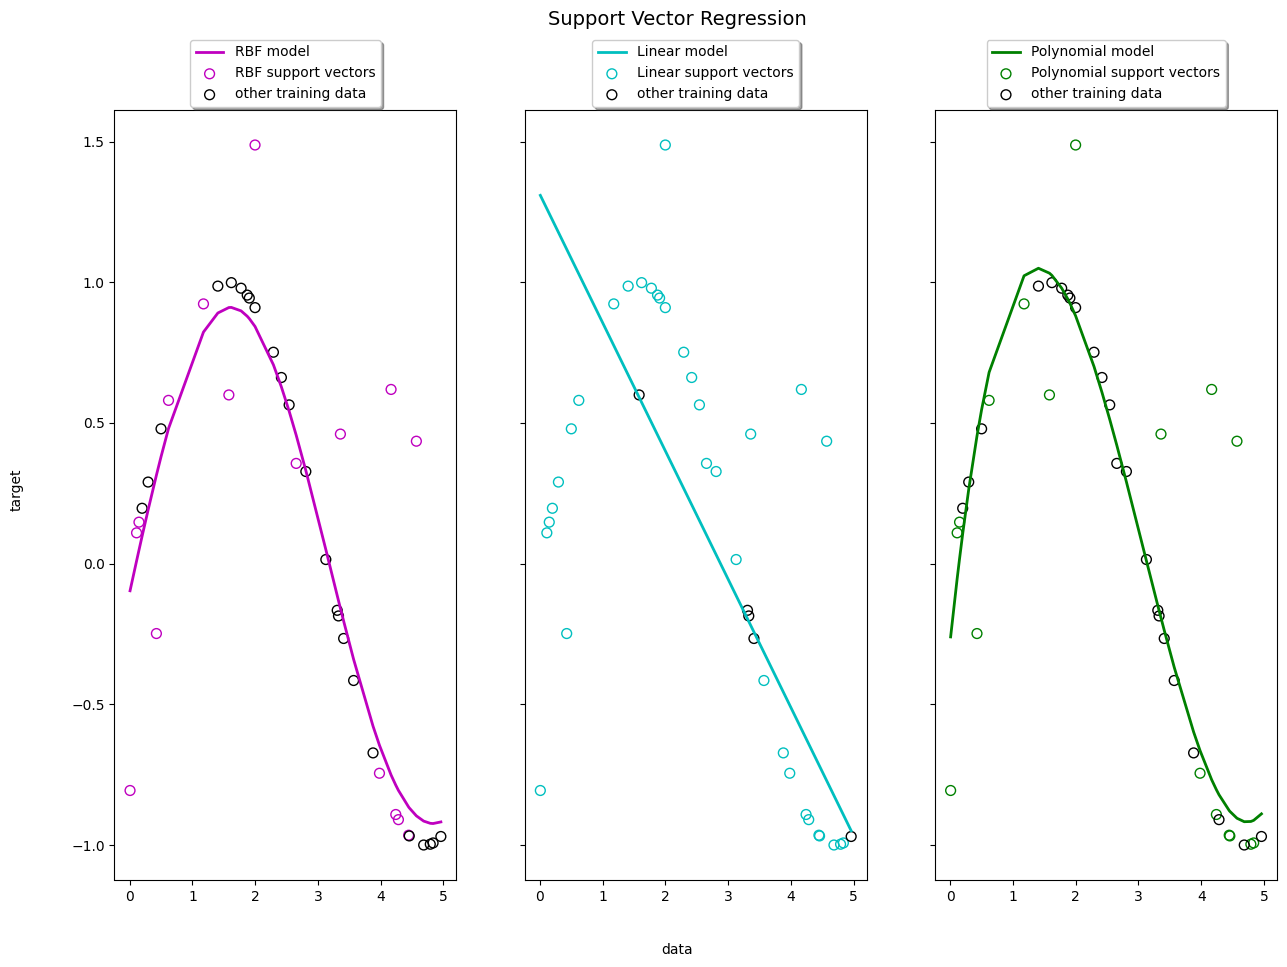

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn.svm import SVR
X = np.sort(5 * np.random.rand(40, 1), axis=0)
y = np.sin(X).ravel()

# add noise to targets
y[::5] += 3 * (0.5 - np.random.rand(8))
# Define SVR models with different kernel functions
svr_rbf = SVR(kernel="rbf", C=100, gamma=0.1, epsilon=0.1) #Radial basis kernel
svr_lin = SVR(kernel="linear", C=100, gamma="auto")
svr_poly = SVR(kernel="poly", C=100, gamma="auto", degree=3, epsilon=0.1, coef0=1)
lw = 2

svrs = [svr_rbf, svr_lin, svr_poly]
kernel_label = ["RBF", "Linear", "Polynomial"]
model_color = ["m", "c", "g"]

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 10), sharey=True)
# Loop over SVR models
for ix, svr in enumerate(svrs):
   # Plot predicted values
    axes[ix].plot(
        X,
        svr.fit(X, y).predict(X),
        color=model_color[ix],
        lw=lw,
        label="{} model".format(kernel_label[ix]),
    )
    # Plot support vectors
    axes[ix].scatter(
        X[svr.support_],
        y[svr.support_],
        facecolor="none",
        edgecolor=model_color[ix],
        s=50,
        label="{} support vectors".format(kernel_label[ix]),
    )
    # Plot other training data point
    axes[ix].scatter(
        X[np.setdiff1d(np.arange(len(X)), svr.support_)],
        y[np.setdiff1d(np.arange(len(X)), svr.support_)],
        facecolor="none",
        edgecolor="k",
        s=50,
        label="other training data",
    )
    axes[ix].legend(
        loc="upper center",
        bbox_to_anchor=(0.5, 1.1),
        ncol=1,
        fancybox=True,
        shadow=True,
    )

fig.text(0.5, 0.04, "data", ha="center", va="center")
fig.text(0.06, 0.5, "target", ha="center", va="center", rotation="vertical")
fig.suptitle("Support Vector Regression", fontsize=14)
plt.show()